In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE, Isomap
import plotly.express as px
from sklearn import linear_model,svm, metrics
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import mode
from sklearn.ensemble import BaggingClassifier

In [261]:
seed = 0

In [262]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/train.csv", na_values=' ')
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/test.csv", na_values=' ')


In [263]:
train.dtypes

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object

In [264]:
column_names = train.columns
print(column_names)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


In [265]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [266]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,-0.306043,-0.557121,0.523551,0.387386,0.594374,-0.547569,-0.820041,-0.901874,-0.845784,-0.684345,-0.643770,-0.631069,-0.102993,-0.137937,-0.163946,-0.116599,0.102762,-0.037786,0.130477,-0.026229,0.026322,0.159966,-0.019575,0.009420,0.033291,0.036587,-0.078640,-0.125131,-0.193802,0.105005,...,-0.678618,-0.347657,-0.877995,0.178195,-0.312968,-0.615441,-0.693210,-0.692876,-0.674830,-0.726645,-0.885103,-0.693210,-0.874292,-0.719795,-0.087878,-0.889442,-0.046516,-0.253649,-0.565425,-0.779376,-0.792391,-0.772836,-0.811409,-0.871927,-0.779376,-0.935785,-0.771497,-0.284627,-0.898859,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,0.282243,0.293867,0.363594,0.343611,0.297818,0.471808,0.259607,0.126333,0.221983,0.371608,0.371581,0.386569,0.468959,0.437268,0.371363,0.306507,0.246593,0.243635,0.230067,0.257383,0.215001,0.208837,0.221432,0.

In [267]:
test.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,-0.303028,-0.574975,0.529679,0.394903,0.607122,-0.563359,-0.838978,-0.904777,-0.876810,-0.701179,-0.642868,-0.664678,-0.093694,-0.105883,-0.142690,-0.124831,0.123073,-0.030495,0.100853,-0.038277,0.045200,0.143128,-0.014339,-0.002145,0.048802,0.029028,-0.092721,-0.108279,-0.207585,0.095198,...,-0.671666,-0.315550,-0.877314,0.160807,-0.262749,-0.567276,-0.707893,-0.717690,-0.696441,-0.754527,-0.897678,-0.707893,-0.898787,-0.727937,-0.047341,-0.880905,-0.029208,-0.290799,-0.601914,-0.780744,-0.791688,-0.774820,-0.806254,-0.869391,-0.780744,-0.943172,-0.775752,-0.248673,-0.902963,0.130236,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,0.274075,0.253431,0.338503,0.326645,0.271650,0.434127,0.211957,0.125120,0.157134,0.325979,0.362060,0.331992,0.445319,0.423831,0.359451,0.310705,0.247947,0.257935,0.235618,0.246854,0.209876,0.207973,0.217290,0

In [268]:
train.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [269]:
test.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

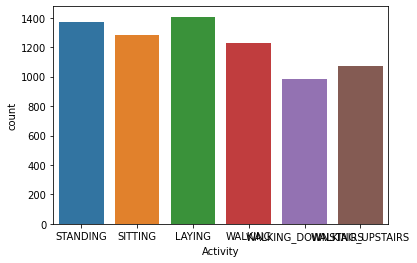

In [270]:
x_train = train[train.columns[:-2]]
y_train = train[train.columns[-1]]
sns.countplot(x=y_train)
y_train.value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64

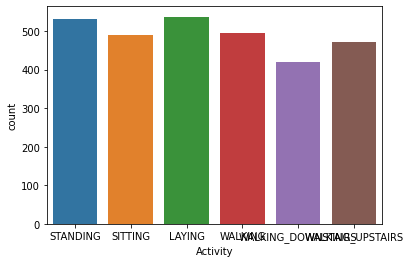

In [271]:
x_test = test[test.columns[:-2]]
y_test = test[test.columns[-1]]
sns.countplot(x=y_test)
y_test.value_counts()

In [272]:
#Standardizing with respect to mean
sc = StandardScaler(with_mean=True)
sc_Xtrain = pd.DataFrame(sc.fit_transform(x_train))
sc_Xtest = pd.DataFrame(sc.fit_transform(x_test))

In [273]:
#LAbel Encoding of y values
le = LabelEncoder()
sc_Ytrain = pd.DataFrame(le.fit_transform(y_train))
sc_Ytest = pd.DataFrame(le.transform(y_test))

In [274]:
#duplicate rows
duplicate_records_train = sc_Xtrain[sc_Xtrain.duplicated(sc_Xtrain.columns)]
duplicate_records_test = sc_Xtest[sc_Xtest.duplicated(sc_Xtest.columns)]
print(len(duplicate_records_test)+len(duplicate_records_train))

0


In [275]:
sc_Xtrain.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,-0.925985,-0.637379,0.906009,0.868656,0.738383,-0.885916,-0.693031,-0.775696,-0.670496,-0.833962,-0.925417,-0.807547,-0.649898,-1.238226,-1.179995,3.412525,-3.876175,1.632454,-0.821570,1.100072,-1.168302,0.498702,-0.341757,0.941865,-2.304371,1.927733,-0.482268,1.380895,1.899523,1.442277,...,-0.684106,-0.843920,-0.973551,-0.310213,0.665226,-0.566395,-0.542472,-0.856486,-0.831505,-0.870115,-0.769823,-0.601486,-0.856486,-0.648504,-0.856208,-1.002717,-0.701322,-0.291789,2.571343,2.878246,-0.771140,-0.747152,-0.754901,-0.733950,-0.616153,-0.771140,-0.462612,-0.761449,-0.929977,-0.706661,-0.795359,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,-0.892228,-0.889197,0.895998,0.868656,0.766503,-0.920694,-0.693210,-0.775105,-0.687585,-0.847202,-0.899180,-0.820495,-1.304893,-0.830194,-1.096128,2.376047,-1.753252,1.321736,0.669927,0.551490,-0.545542,0.643345,-1.181642,0.267665,-0.256357,-0.225406,-0.610135,0.307609,0.365782,1.231020,...,-0.683883,-0.843300,-0.973551,0.194698,1.394609,-0.869766,-0.824541,-0.880846,-0.899692,-0.896338,-0.886027,-0.614915,-0.880846,-0.651467,-0.860360,-1.034416,-0.376015,-0.797616,-0.253097,-0.473334,-0.785153,-0.768635,-0.774030,-0.751862,-0.633698,-0.785153,-0.462928,-0.775658,-1.133978,-0.706661,0.130614,-0.897357,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,-0.892228,-0.889197,0.880323,0.858633,0.822606,-0.923974,-0.693125,-0.774088,-0.692379,-0.841765,-0.864042,-0.888923,-1.043324,-0.795638,-1.096128,1.271259,-0.766783,1.539242,-1.283260,0.168551,-0.469000,0.872947,-1.413576,0.803535,-0.783702,0.581164,-0.948921,0.001190,0.038350,1.307621,...,-0.683790,-0.831221,-0.973551,-0.141909,1.901961,-1.148137,-0.906727,-0.883709,-0.908073,-0.901039,-0.901922,-0.637236,-0.883709,-0.651688,-0.858037,-1.060306,0.599907,-0.588058,-0.862529,-0.938429,-0.782166,-0.763843,-0.771239,-0.748593,-0.641077,-0.782166,-0.462874,-0.772916,-1.133978,2.398628,1.152336,-0.260878,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,-0.957097,-0.927662,0.880323,0.858633,0.817653,-0.929518,-0.693150,-0.774691,-0.692533,-0.841900,-0.915150,-0.918239,-1.118413,-1.630673,-2.014141,0.580889,-0.113240,0.968687,-1.716070,0.383790,-0.844897,0.781470,-0.683046,0.998101,-1.569176,1.886294,-1.682079,-0.497239,-0.509972,1.044378,...,-0.684004,-0.834992,-0.973551,9.956315,1.973399,-1.082422,-0.851992,-0.884181,-0.913674,-0.908540,-0.887487,-0.640096,-0.884181,-0.651801,-0.845163,-1.034755,-0.701322,0.038323,0.072130,0.165978,-0.782856,-0.764255,-0.775004,-0.745404,-0.640381,-0.782856,-0.462883,-0.778031,-1.063749,-0.263048,1.112769,0.591045,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,-0.932347,-0.910626,0.895413,0.861104,0.817653,-0.943423,-0.693208,-0.775640,-0.693672,-0.844118,-0.908240,-0.931996,-1.457712,-0.964095,-1.609017,1.402589,-0.948873,0.939776,-0.189407,1.102884,-1.389977,1.315770,-1.335942,1.504306,-1.398040,0.604664,-0.044306,-0.084470,0.012201,1.282483,...,-0.684204,-0.851491,-0.973551,-0.646820,1.501007,-0.602147,-0.705147,-0.890211,-0.917464,-0.911142,-0.903568,-0.652506,-0.890211,-0.651937,-0.845745,-1.104198,-0.050708,-0.803360,-0.785768,-0.

# PCA

In [276]:
#PCA
n=sc_Xtrain.shape[1]
pca = PCA(n_components=n)
pca.fit(sc_Xtrain)
var_ratios = pca.explained_variance_ratio_
cummulative_var = np.cumsum(var_ratios)


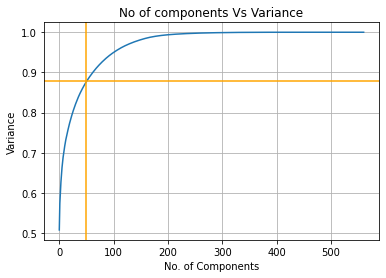

In [277]:
plt.title("No of components Vs Variance")
plt.plot(np.arange(len(cummulative_var)),cummulative_var)
plt.xlabel("No. of Components")
plt.ylabel("Variance");
plt.axvline(x=50, ymin=0,ymax=1,c='orange')
plt.axhline(y=cummulative_var[50],xmin=0, xmax=sc_Xtrain.shape[1], color='orange')
plt.grid()

In [278]:
n_components = 50
quality_retained = cummulative_var[n_components]* 100
print(quality_retained)

87.7385282822031


In [279]:
pca50 = PCA(n_components)
pca_Xtrain = pd.DataFrame(pca50.fit_transform(sc_Xtrain) )
# pca_Xtest = pd.DataFrame(pca50.transform(sc_Xtest))
print(pca_Xtrain.shape)#,'\t',pca_Xtest.shape)

(7352, 50)


In [280]:
pca_Xtrain.columns

RangeIndex(start=0, stop=50, step=1)

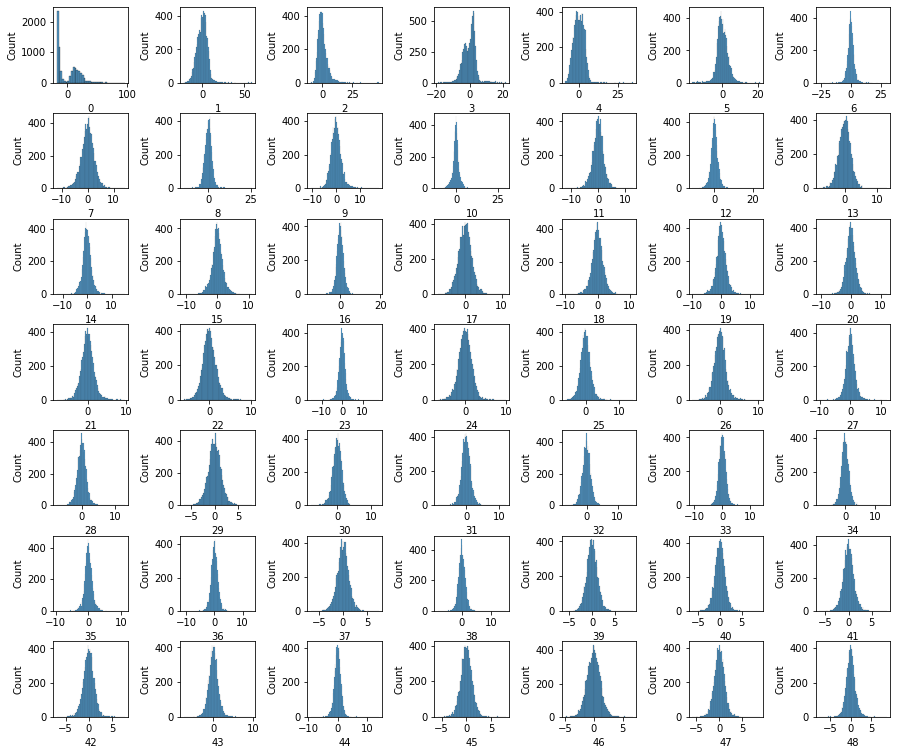

In [281]:
#histplot for two adacent columns
plt.figure(figsize=(15, 15))
for i in range(1,len(pca_Xtrain.columns)):
  plt.subplot(8,7,i)
  sns.histplot(x= pca_Xtrain[pca_Xtrain.columns[i-1]]);
plt.subplots_adjust(wspace=0.7, hspace=0.4)


In [282]:
pca_df = pca_Xtrain[pca_Xtrain.columns[:10]]
pca_df['target'] = sc_Ytrain
pca_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,0,1,2,3,4,5,6,7,8,9,target
0,-16.138544,2.152024,3.144780,-0.272464,6.798938,-4.249394,2.937160,-4.905413,-0.775500,-3.627726,2
1,-15.296194,1.387144,-0.682221,2.813677,4.266170,-2.055663,0.011206,-1.845985,0.492555,-0.180176,2
2,-15.137019,2.473351,-1.756641,3.717974,4.181557,-1.357518,0.072946,-1.388186,0.539747,-0.671711,2
3,-15.350884,3.915681,-1.790322,2.567521,3.205840,-0.942943,0.530735,-1.832183,1.071512,-1.496985,2
4,-15.544814,4.598737,-2.188582,2.897578,3.080150,-1.061458,-1.048590,-0.816933,0.600059,1.118873,2


<Figure size 432x288 with 0 Axes>

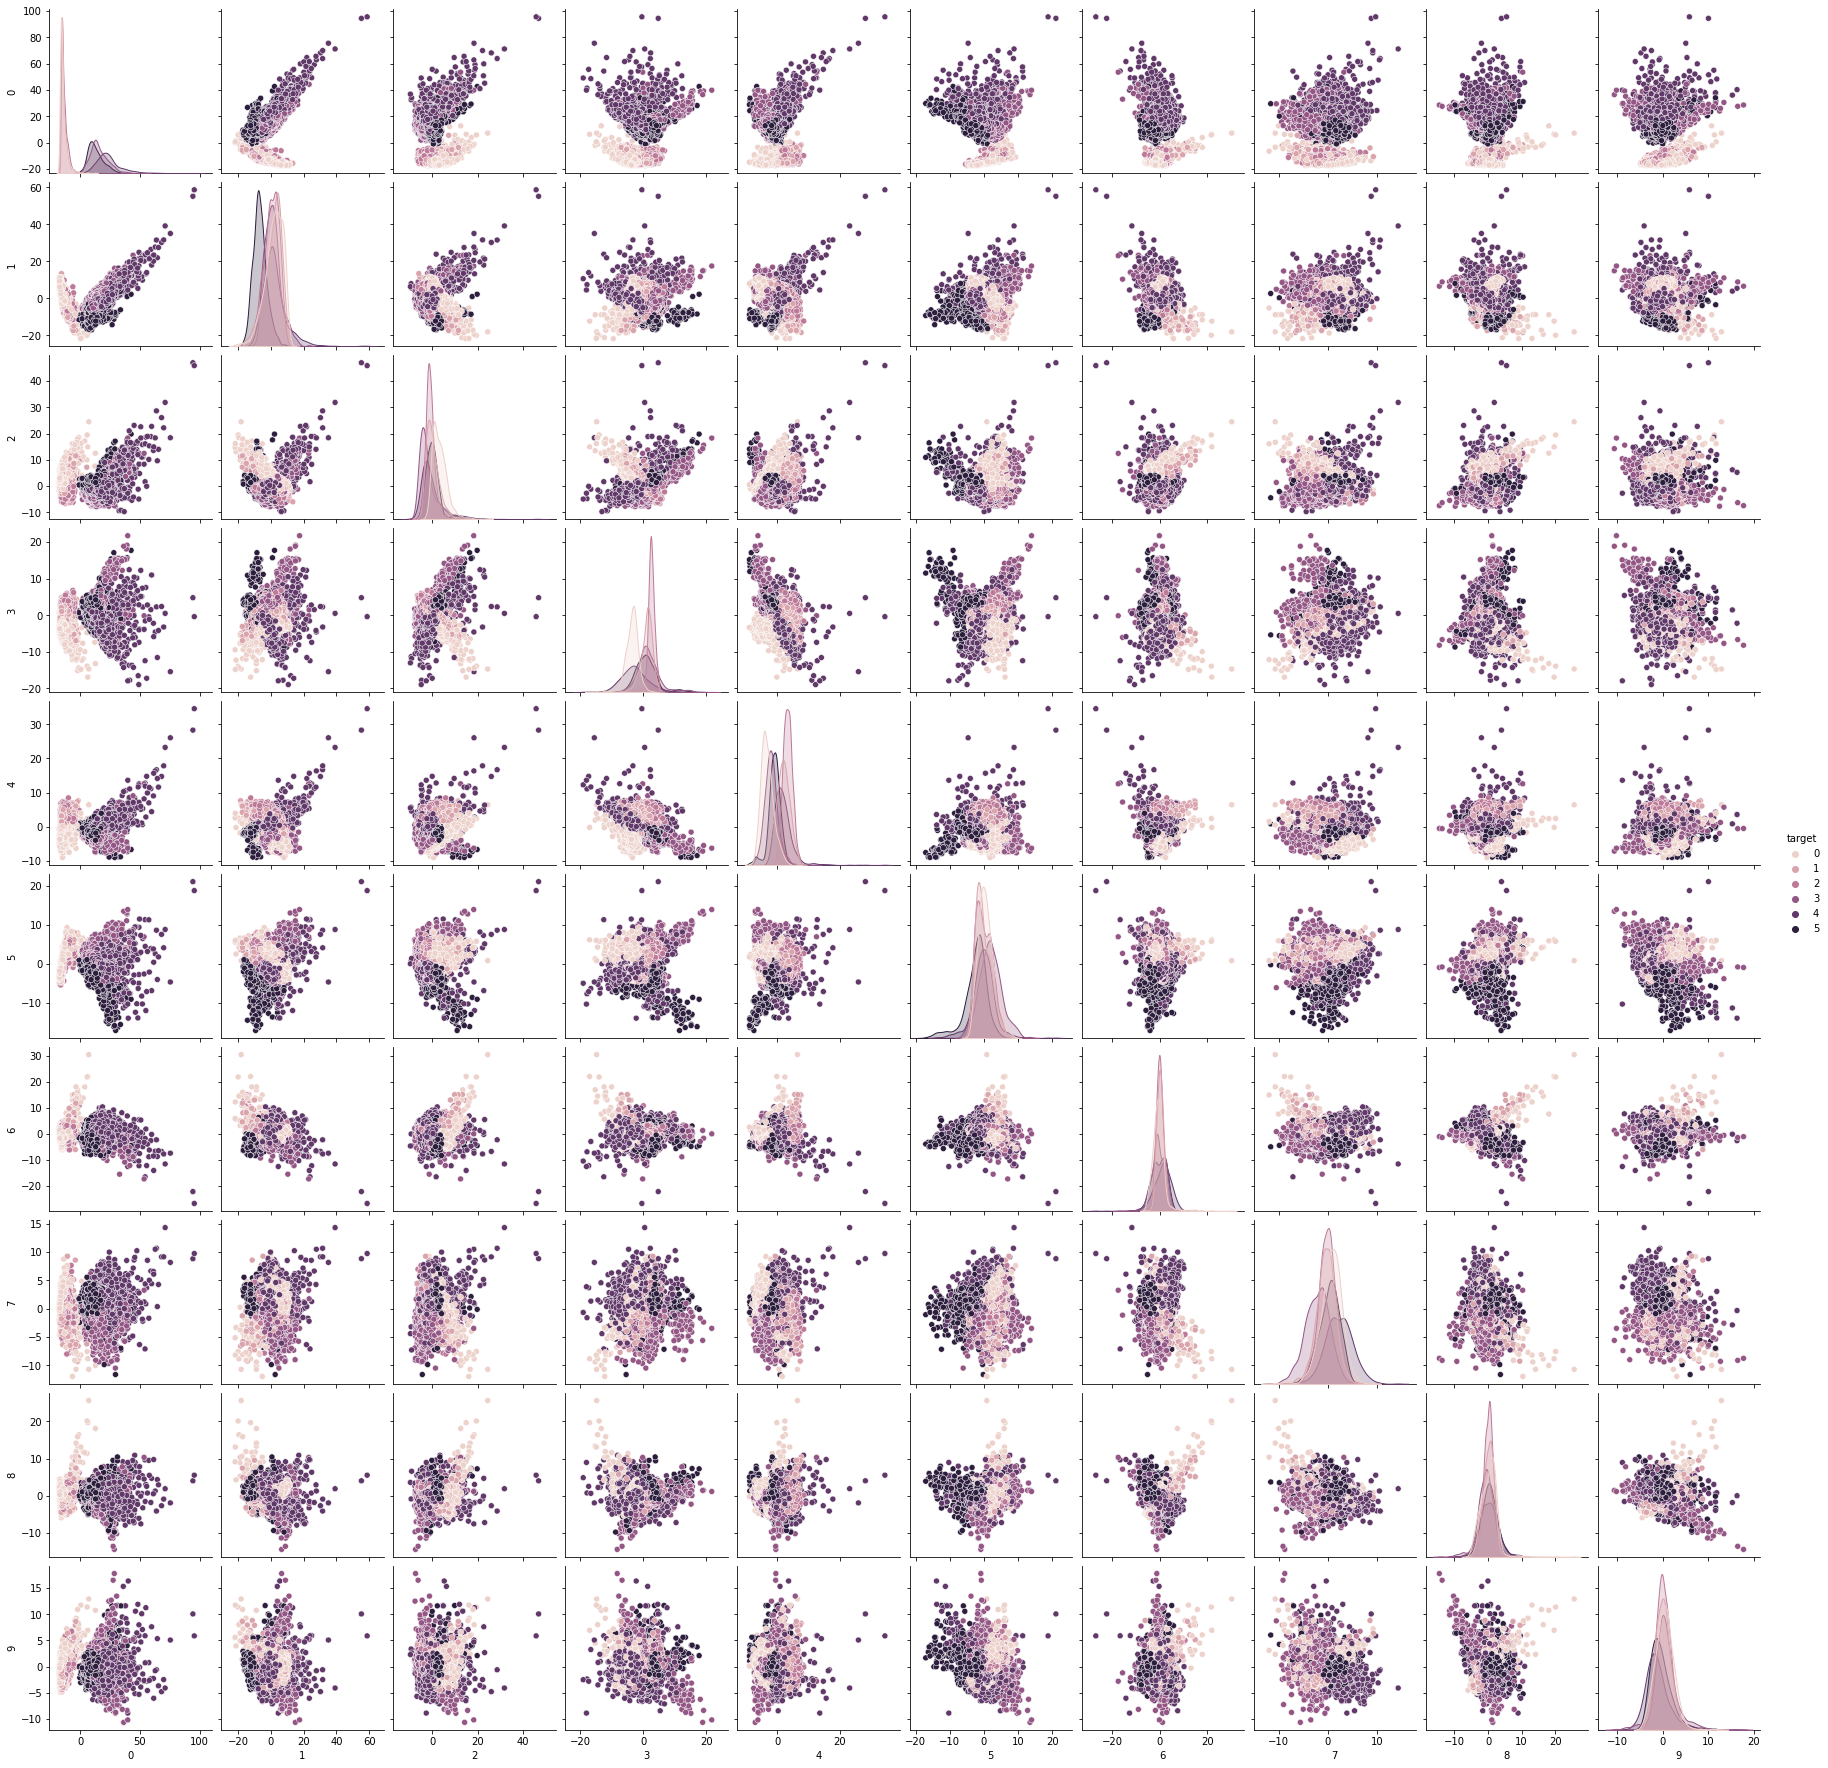

In [283]:
#pairplot for 10 columns
plt.suptitle('Visualizing PCA pairwise',size=20)
sns.pairplot(pca_df, hue="target") 

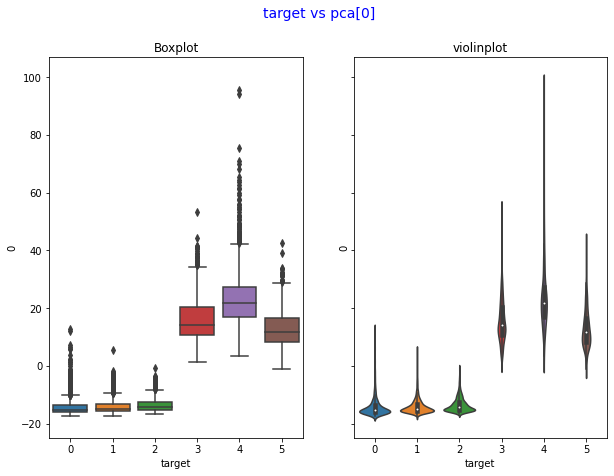

In [284]:
cols = pca_df.columns

fig, axes = plt.subplots(1,2, figsize=(10,7),  sharey=True)
fig.suptitle("target vs pca[0]", color='b', fontsize=14)

sns.boxplot(ax=axes[0], y=cols[0], x="target", data=pca_df)
axes[0].set_title("Boxplot")

#voilin plot ----in addition to boxplot in represents the full distribution of data
sns.violinplot(ax=axes[1], x="target", y=cols[0], data=pca_df)
axes[1].set_title("violinplot");

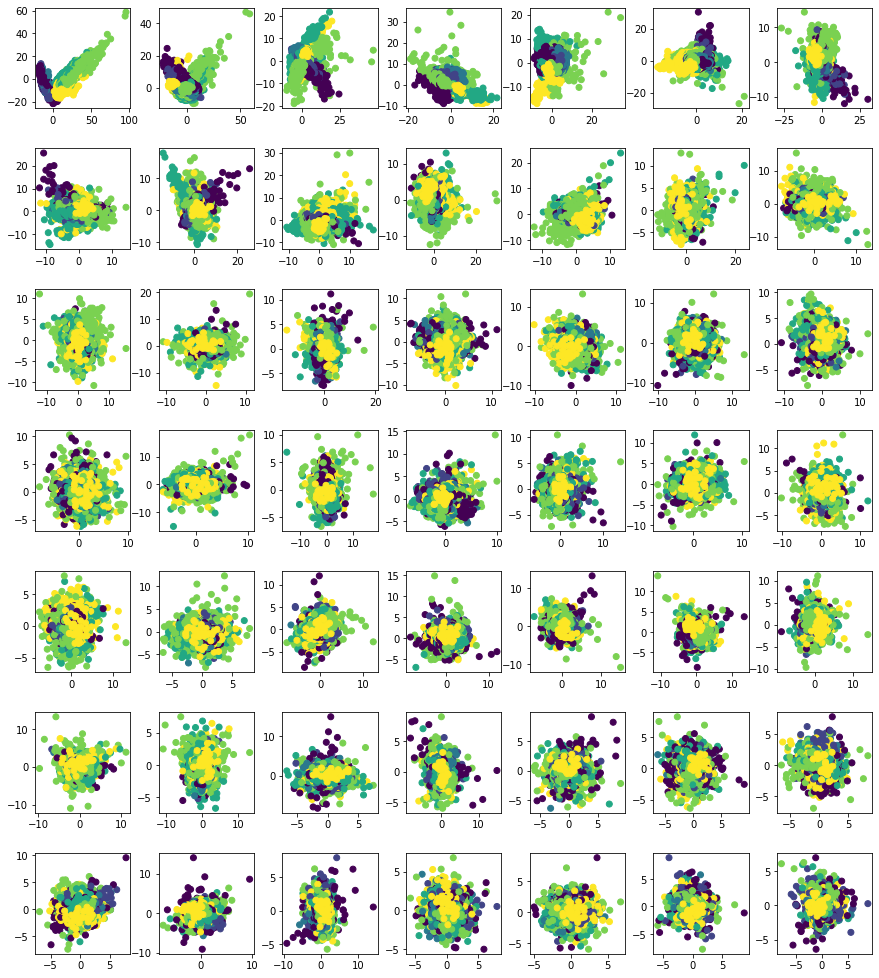

In [285]:
#scatter plot for each PCA
plt.figure(figsize=(15, 20))
for i in range(1,len(pca_Xtrain.columns)):
  plt.subplot(8,7,i)
  plt.scatter(pca_Xtrain[i-1], pca_Xtrain[i],c=sc_Ytrain)
plt.subplots_adjust(wspace=0.3, hspace=0.4)


# t-SNE or t-distributed stochastic Neighbor Embedding on PCA data

In [286]:
###work some more on tsne

In [287]:
#t-SNE probabilistic one. ---for non linear seperable data
#t-SNE or t-distributed stochastic Neighbor Embedding
tsne = TSNE(n_components=3)
Xtrain_tsne = tsne.fit_transform(pca_Xtrain)

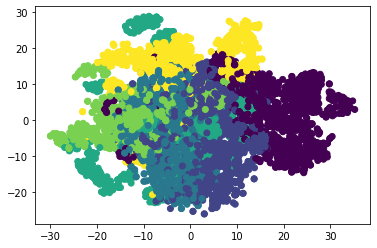

In [288]:
plt.scatter(Xtrain_tsne.T[0],Xtrain_tsne.T[1],c=sc_Ytrain)

# only t-SNE

In [289]:
###try tunning perplexity and step

In [ ]:
#tsne without pca
tsne3 = TSNE(n_components=3)
Xtrain_tsne3 = tsne3.fit_transform(sc_Xtrain)
plt.scatter(Xtrain_tsne3.T[0],Xtrain_tsne3.T[1],c=sc_Ytrain)
##add legend

perplexity,” which says (loosely) how to balance attention between local and global aspects of your data. The original paper says, “The performance of SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50.” 

# Comparision

In [ ]:
#for 2 components
plt.figure(figsize=(24,6))
plt.subplot(1,3,1)
plt.title("pca")
plt.scatter(pca_Xtrain[0],pca_Xtrain[1],c=sc_Ytrain)
plt.colorbar()

plt.subplot(1,3,2)
plt.title("pca and tsne")
plt.scatter(Xtrain_tsne.T[0],Xtrain_tsne.T[1],c=sc_Ytrain)
plt.colorbar()

plt.subplot(1,3,3)
plt.title("only tsne")
plt.scatter(Xtrain_tsne3.T[0],Xtrain_tsne3.T[1],c=sc_Ytrain)
plt.colorbar()
plt.subplots_adjust(wspace=0.1)

In [ ]:
fig = plt.figure(figsize = (20, 5))
fig.suptitle("COMPARING THREE TECHNIQUES", fontsize=14)

#########pca#############
x= pca_Xtrain[0]
y = pca_Xtrain[1]
z= pca_Xtrain[2]
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter3D(x, y, z, c= sc_Ytrain, label='pca')
plt.title("PCA")

###########tsne without pca#############
x= Xtrain_tsne3.T[0]
y = Xtrain_tsne3.T[1]
z= Xtrain_tsne3.T[2]
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter3D(x, y, z, c= sc_Ytrain, label='tsne')
plt.title("only TSNE")

#########tsne on pca###############
x= Xtrain_tsne.T[0]
y = Xtrain_tsne.T[1]
z= Xtrain_tsne.T[2]
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.scatter3D(x, y, z, c= sc_Ytrain, label='pca and tsne')
plt.title("PCA and TSNE");

fig.legend(loc='lower right');


In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.title("pca")
sns.heatmap(pca_Xtrain.corr())  #why clean purples except last one

plt.subplot(1,3,2)
plt.title("pca and tsne")
sns.heatmap(pd.DataFrame(Xtrain_tsne).corr())

plt.subplot(1,3,3)
plt.title("only tsne")
sns.heatmap(pd.DataFrame(Xtrain_tsne3).corr())

plt.subplots_adjust(wspace=0.1)

#no highly correlated features

# ICA on Dataset before PCA

In [ ]:
# Xpca_ica = pd.DataFrame(Xpca_ica)
# Xpca_ica
blues1 = train.loc[train.Activity == 'SITTING']
blues2 = train.loc[train.Activity=='LAYING']
blues = pd.concat([blues1, blues2])
le.fit(blues[blues.columns[-1]])
Y_true = le.transform(blues[blues.columns[-1]])

In [ ]:
bb  = np.array(blues[blues.columns[:-2]])
Y_true = np.array(Y_true)

ica = FastICA(n_components = 3, random_state= 0)
Xica = ica.fit_transform(bb, Y_true)

In [ ]:
fig = px.scatter_3d(Xica, x=0, y=1, z=2, color=Y_true, title='SITTING and LAYING data')
fig.show()

# ICA Decomposition on PCA data to seperate two blues 

In [ ]:
pca = PCA(n_components=100)
pca.fit_transform(blues[blues.columns[:-2]])
var_ratios = pca.explained_variance_ratio_
cummulative_var = np.cumsum(var_ratios)


In [ ]:
bb  = np.array(blues[blues.columns[:-2]])
Y_true = np.array(Y_true)

In [ ]:
pca_ica = FastICA(n_components = 3, random_state= 0)
Xpca_ica = pca_ica.fit_transform(bb, Y_true)

In [ ]:
pca_ica_sinx = FastICA(n_components = 3, random_state= 0)
Xpca_ica_sinx = pca_ica.fit_transform(np.sin(bb), Y_true)

In [ ]:
fig = plt.figure(figsize = (20, 10))
fig.suptitle("PCA and ICA")
ax = fig.add_subplot(2, 4, 1, projection='3d')
ax.scatter3D(Xpca_ica.T[0], Xpca_ica.T[1], Xpca_ica.T[2], c = Y_true, label='pca&ica3d')

ax1 = fig.add_subplot(2,4,2)
ax1.scatter(Xpca_ica.T[0], Xpca_ica.T[1],c=Y_true, label='pca&ica2d01')

ax2 = fig.add_subplot(2,4,3)
ax2.scatter(Xpca_ica.T[0], Xpca_ica.T[2], c= Y_true,label='pca&ica2d02')

ax3 = fig.add_subplot(2,4,4)
ax3.scatter(Xpca_ica.T[1], Xpca_ica.T[2],c=Y_true,label='pca&ica2d12')

####sinx
ax = fig.add_subplot(2, 4, 5, projection='3d')
ax.scatter3D(Xpca_ica_sinx.T[0], Xpca_ica_sinx.T[1], Xpca_ica_sinx.T[2], c = Y_true, label='sinx_pca&ica3d')

ax1 = fig.add_subplot(2,4,6)
ax1.scatter(Xpca_ica_sinx.T[0], Xpca_ica_sinx.T[1],c=Y_true, label='sinx_pca&ica2d01')

ax2 = fig.add_subplot(2,4,7)
ax2.scatter(Xpca_ica_sinx.T[0], Xpca_ica_sinx.T[2], c= Y_true,label='sinx_pca&ica2d02')

ax3 = fig.add_subplot(2,4,8)
ax3.scatter(Xpca_ica_sinx.T[1], Xpca_ica_sinx.T[2],c=Y_true,label='sinx_pca&ica2d12')

fig.legend(loc='upper right')

In [ ]:
fig = px.scatter_3d(Xpca_ica, x=0, y=1, z=2, symbol=Y_true, color=Y_true, opacity=1)
fig.show()

#Checking ICA performance on entire dataset

In [ ]:
# ica on entire dataset

transformed_Xtrain = pca_Xtrain
transformed_Ytrain = sc_Ytrain

In [ ]:
ica = FastICA(n_components = 3, random_state= 0)
ica_complete_data = ica.fit_transform(transformed_Xtrain, transformed_Ytrain)

In [ ]:
fig = px.scatter_3d(ica_complete_data, x=0, y=1, z=2, symbol=sc_Ytrain, color=sc_Ytrain, opacity=1)
fig.show()

##Not good on entire data

# Transformation / Mapping 

In [ ]:
# Xpca_ica ---sinx 
#subplot all of them into one plot
# plt.subplot(2,3,1)
sinx_transformed =pd.DataFrame(np.sin(0.1*Xpca_ica))
fig2= px.scatter_3d(sinx_transformed, x=0, y=1, z=2, symbol=Y_true, color=Y_true, opacity=0.7)
fig2.show()

In [ ]:
# Xpca_ica ---cosx 
cosx_transformed =pd.DataFrame(np.cos(Xpca_ica))

fig2= px.scatter_3d(cosx_transformed, x=0, y=1, z=2, symbol=Y_true, color=Y_true, opacity=0.7)
fig2.show()

In [ ]:
# Xpca_ica ---tanx 
tanx_transformed =pd.DataFrame(np.tan(Xpca_ica))

fig2= px.scatter_3d(tanx_transformed, x=0, y=1, z=2, symbol=Y_true, color=Y_true, opacity=0.7)
fig2.show()

In [ ]:
#arcsin --
arcsin_transformed =pd.DataFrame(np.arcsin(Xpca_ica))

fig2= px.scatter_3d(arcsin_transformed, x=0, y=1, z=2, symbol=Y_true, color=Y_true, opacity=0.7)
fig2.show()


# Classic ML Models

In [ ]:
###Finally transformed data
#lets just say
#shuffling

transformed_Xtrain = sc_Xtrain 
transformed_Ytrain = sc_Ytrain

# Logistic Regression

In [ ]:
##################################### doubt ---Warning

In [ ]:
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penality':['l2','l1']}
log_reg = linear_model.LogisticRegression(max_iter= 150, solver='lbfgs')  ##read this
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1) #verbose where is log??????????
log_reg_grid_results = log_reg.fit(transformed_Xtrain[transformed_Xtrain.columns[:-1]], np.array(transformed_Ytrain).ravel())

In [ ]:
lr_pred = log_reg_grid_results.predict(sc_Xtest[sc_Xtest.columns[:-1]])
confusion_matrix(sc_Ytest, lr_pred)

#Support Vector Machine

In [ ]:
parameters = {'kernel':['linear', 'rbf'],'C':[0.125, 0.5, 1, 2, 8, 16]}
svc = svm.SVC(tol = 0.00005)
lr_svc_grid = GridSearchCV(svc, parameters, verbose=1)
lr_svc_grid_results = svc.fit(transformed_Xtrain[transformed_Xtrain.columns[:-1]], transformed_Ytrain[0])

svm_pred = lr_svc_grid_results.predict(sc_Xtest[sc_Xtest.columns[:-1]])

In [ ]:
cm = confusion_matrix(sc_Ytest, svm_pred)
cm

# Decision Tree

In [ ]:
parameters = {'max_depth': np.arange(3,10,1)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, param_grid=parameters, verbose=1)
dt_model = dt.fit(transformed_Xtrain[transformed_Xtrain.columns[:-1]], transformed_Ytrain)


In [ ]:
sc_Xtest = sc_Xtest.drop(sc_Xtest.columns[-1], axis=1)
dt_pred = dt_model.predict(sc_Xtest)

In [ ]:
confusion_matrix(sc_Ytest, dt_pred)

#Accuracies

In [ ]:
#Accuracy
no_of_models = 3
diff_model_acc = []
predicted_val4model =[lr_pred, svm_pred, dt_pred]
for i in range(no_of_models):
  acc  = accuracy_score(sc_Ytest, predicted_val4model[i])
  diff_model_acc.append(acc*100)

In [ ]:
diff_model_acc

In [ ]:
plt.plot(range(no_of_models), diff_model_acc, marker='o', markersize=14, markerfacecolor='m' )
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Accuracy for different models", fontsize=14)
plt.xlabel("Models - log reg, svm, dec tree")
plt.ylabel("Accuracy");

# Confusion Matrix

In [ ]:
no_of_models = 3
diff_model_cm = []
model_names=['log_reg', 'svc', 'dt']
predicted_val4model =[lr_pred, svm_pred, dt_pred]
for i in range(no_of_models):
  conf_mat  = confusion_matrix(sc_Ytest, predicted_val4model[i])
  diff_model_cm.append(conf_mat)

  df_cm = pd.DataFrame(conf_mat, index=train['Activity'].unique(), columns=train['Activity'].unique())
  plt.figure(figsize = (7,4), dpi=120) #width, height  #fiqsize - fig size in inches dpi --no of pixels for inch
  plt.xlabel("Actual")
  plt.ylabel('Predicted')
  plt.title(model_names[i], fontsize=12, color='r' )
  sns.heatmap(df_cm, annot=True, annot_kws={'size':12},cmap = plt.cm.Blues)
  print("\n")

# diff_model_cm

# Random Forest using Bagging

In [ ]:
seed = 8
kfold = KFold(n_splits = 3, random_state = seed, shuffle=True) 

In [ ]:
base_classifier = dt
num_trees = 100

In [ ]:
bag_model = BaggingClassifier(base_estimator= base_classifier, n_estimators= num_trees, random_state=seed)
results = cross_val_score(bag_model,sc_Xtest, np.array(sc_Ytest).ravel(), cv = kfold)
print(results.mean())

# Basic Ensemble-- Max Voting

In [ ]:
results = [lr_pred, svm_pred, dt_pred]
combined_results = np.array(results)

In [ ]:
ense_pred = mode(combined_results)
ense_pred[0]

In [ ]:
ense_results = pd.DataFrame(ense_pred[0].T)
(ense_results==sc_Ytest).value_counts()
print("wrongly classified are ",(ense_results==sc_Ytest).value_counts()[0])

# Modelling by renaming SITTING and LAYING and classifying later

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/train.csv", na_values=' ')
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/test.csv", na_values=' ')


In [ ]:
TRAIN_DF = train
TEST_DF = test


In [ ]:
#Merging Laying and sitting classes
train_laying = TRAIN_DF.loc[TRAIN_DF['Activity']== 'LAYING']
train_sitting = TRAIN_DF.loc[TRAIN_DF['Activity']== 'SITTING']

TRAIN_DF.loc[TRAIN_DF['Activity']== 'LAYING', 'Activity'] ='COMBINED'
TRAIN_DF.loc[TRAIN_DF['Activity']== 'SITTING', 'Activity']='COMBINED'

test_laying = TEST_DF.loc[TEST_DF['Activity']== 'LAYING']
test_sitting = TEST_DF.loc[TEST_DF['Activity']== 'SITTING']

TEST_DF.loc[TEST_DF['Activity']== 'LAYING', 'Activity'] ='COMBINED'
TEST_DF.loc[TEST_DF['Activity']== 'SITTING', 'Activity']='COMBINED'

In [ ]:
TRAIN_DF['Activity'].unique()

In [ ]:
encoded = le.fit_transform(TRAIN_DF['Activity']) 
pd.DataFrame(encoded)[0].unique()

In [ ]:
le.inverse_transform([0]) ###Topology is followed for encoding

In [ ]:
TRAIN_DF.columns

In [ ]:
#Seperating independent and dependent variables
YTRAIN = TRAIN_DF['Activity']
XTRAIN = TRAIN_DF.drop(['Activity','subject'], axis=1)

YTEST = TEST_DF['Activity']
XTEST = TEST_DF.drop(['Activity','subject'], axis=1)

In [ ]:
#Applying pca
n=XTRAIN.shape[1]
pca = PCA(n_components=n)
pca.fit(XTRAIN)
var_ratios = pca.explained_variance_ratio_
cummulative_var = np.cumsum(var_ratios)

In [ ]:
plt.title("No of components Vs Variance")
plt.plot(np.arange(len(cummulative_var)),cummulative_var)
plt.xlabel("No. of Components")
plt.ylabel("Variance");
plt.grid()

In [ ]:

temp = pd.DataFrame(pca.transform(XTRAIN))
PCA_XTRAIN = temp[temp.columns[:50]]

temp = pd.DataFrame(pca.transform(XTEST))
PCA_XTEST = temp[temp.columns[:50]]
# type(PCA_XTRAIN)

In [ ]:
# Lets say we decide to use SVM as log reg has some warning
# check for more parameters

parameters = {'kernel':['linear', 'rbf'],'C':[0.125, 0.5, 1, 2, 8, 16]}
svc = svm.SVC(tol = 0.00005)
lr_svc_grid = GridSearchCV(svc, parameters, verbose=1)
lr_svc_grid_results = svc.fit(PCA_XTRAIN, YTRAIN)

svm_5cls = lr_svc_grid_results.predict(PCA_XTEST)

In [ ]:
confusion_matrix(YTEST, svm_5cls)

In [ ]:
accuracy_score(YTEST, svm_5cls)

In [ ]:
####connecting these two how???

# Connecting them to do

In [ ]:
#SEperating 2 columns --train
blues1 = train.loc[train.Activity == 'SITTING']
blues2 = train.loc[train.Activity=='LAYING']
blues = pd.concat([blues1, blues2])
le.fit(blues[blues.columns[-1]])
Y_true = le.transform(blues[blues.columns[-1]])

In [ ]:
bb  = np.array(blues[blues.columns[:-2]])
Y_true = np.array(Y_true)

ica = FastICA(n_components = 3, random_state= 0)
Xica = ica.fit_transform(bb, Y_true)

In [ ]:
 parameters = {'kernel':['linear', 'rbf'],'C':[0.125, 0.5, 1, 2, 8, 16]}
svc = svm.SVC(tol = 0.00005)
lr_svc_grid = GridSearchCV(svc, parameters, verbose=1)
lr_svc_grid_results = svc.fit(Xica, Y_true)

svm_2cols = lr_svc_grid_results.predict(Xica)

In [ ]:
confusion_matrix(Y_true, svm_2cols)

for test data

In [ ]:
#SEperating 2 columns --test
blues1 = test.loc[test.Activity == 'SITTING']
blues2 = test.loc[test.Activity=='LAYING']
blues = pd.concat([blues1, blues2])
le.fit(blues[blues.columns[-1]])
Y_true = le.transform(blues[blues.columns[-1]])

In [ ]:
bb  = np.array(blues[blues.columns[:-2]])
Y_true = np.array(Y_true)

ica = FastICA(n_components = 3, random_state= 0)
Xica = ica.fit_transform(bb, Y_true)

In [ ]:
px.scatter_3d(Xica, x=0, y=1, z=2, color=Y_true, title='SITTING and LAYING data')

In [ ]:
parameters = {'kernel':['linear', 'rbf'],'C':[0.125, 0.5, 1, 2, 8, 16]}
svc = svm.SVC(tol = 0.00005)
lr_svc_grid = GridSearchCV(svc, parameters, verbose=1)
lr_svc_grid_results = svc.fit(Xica, Y_true)

svm_2cols = lr_svc_grid_results.predict(Xica)

In [ ]:
confusion_matrix(Y_true, svm_2cols)

# To Do or Learn

In [ ]:
#average of predict_proba

In [ ]:
# time taken to train
# classification report
# how to print best hyper parameters searched 
# ROC curve

In [ ]:
# Read more about Bagging
# Bagging on different algorithms ---like svm, logistic
#AdaBoosting
# Gradient Boosting.
# Light GBM
# XGB

In [ ]:
# and plots between various hyperparameters
# ALL possible plots  voilinplots and distplot

# https://towardsdatascience.com/data-visualization-for-machine-learning-and-data-science-a45178970be7
#Distribution plot -- seaborn histogram 
#join plot
#bar chart
# line plot
# dendogram
#graphviz for tree

In [ ]:
#check for which models standardization is not required and other

In [ ]:
# dunns index, bhattacharya divergece
# silhouette approach

In [ ]:
#try Deep Learning Models if possible --Deep Learning model LSTM with different activation functions like ReLU, SVM 
# Use validation data

In [ ]:
# performance metrics like precision, recall, confusion matrix, ROC curve, accuracy. 
#declare which is best

In [ ]:
# when to use one hot encoding

In [ ]:
# tree postpruning and prepruning

In [ ]:
# Add implementations from scratch as my implementations

In [ ]:
#SVD
#LDA
#Quadratic Discriminant Analysis
# Isomap